In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [2]:
model = read_sbml_model('iCW773_psilocybin.xml') #Loading the model

No objective coefficients in model. Unclear what should be optimized


In [3]:
#Defining Optimization Target
model.objective = model.reactions.CG_biomass_cgl_ATCC13032
model.optimize().objective_value

0.428929662134894

In [4]:
#Flux Scanning Enforced Objective Flux Algorithm
fseof = FSEOF(model)
f_result = fseof.run(target=model.reactions.EX_psi_e) #Defining Flux of Interest (x axis)
frdf = f_result.data_frame

Text(0, 0.5, 'Flux $\\left[\\dfrac{mmol}{gDW\\cdot h}\\right]$')

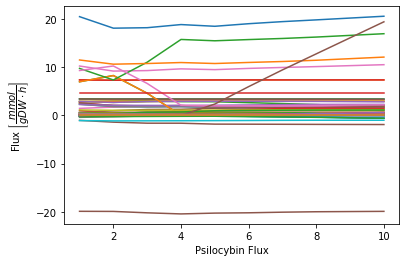

In [5]:
#Plotting FSEOF Results
frdf.T.plot(legend= None) #Legend too big to show
plt.xlabel("Psilocybin Flux")
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$")

In [6]:
frdf['RCiF'] = (frdf[10]-frdf[1])/frdf[10] +1 #Adding "Relative Change in Flux" Column
frdf['Dif'] = abs(frdf[10])-abs(frdf[1]) #Adding a "Subtraction" Column

In [7]:
frdf.sort_values(by=[10], ascending= False)

,1,2,3,4,5,6,7,8,9,10,RCiF,Dif
CYTBO3_4pp,20.509529,18.118434,18.215713,18.867714,18.510863,19.044826,19.477530,19.841262,20.218461,20.595660,1.004182,0.086131
ATPM,0.000000,0.000000,0.000000,0.000000,2.360546,5.978027,9.453660,12.787363,16.114064,19.440764,2.000000,19.440764
NADH5,9.762295,7.365395,11.050999,15.774447,15.499099,15.751616,15.979863,16.271976,16.620110,16.968243,1.424673,7.205948
CO2tpp,11.512734,10.639805,10.779048,10.981502,10.779239,10.998988,11.194854,11.456261,11.783385,12.110509,1.049360,0.597775
O2tpp,10.259713,9.205807,9.311418,9.669318,9.506920,9.762617,9.959854,10.137228,10.335880,10.534532,1.026087,0.274819
...,...,...,...,...,...,...,...,...,...,...,...,...
IPPMIb,-0.150442,-0.135543,-0.120644,-0.105745,-0.101245,-0.184891,-0.267374,-0.363827,-0.473208,-0.582590,1.741770,0.432148
KARA1,-0.267720,-0.241206,-0.214692,-0.188179,-0.172064,-0.244096,-0.314964,-0.399803,-0.497570,-0.595336,1.550304,0.327616
RPI,-1.071520,-1.134215,-1.122409,-1.108143,-1.083711,-1.056220,-1.020897,-1.003660,-1.003660,-1.003660,0.932387,-0.067860
PPKr,-1.028255,-1.399179,-1.614247,-1.619666,-1.808760,-1.823700,-1.842594,-1.862867,-1.878830,-1.894793,1.457326,0.866538


In [8]:
target_reactions = frdf.loc[(frdf['RCiF'] < 2.0) & (frdf['RCiF'] >= 1.8)] #Selecting Reactions with a change between 80 % and 99.99 %
target_reactions.sort_values(by=['RCiF'], ascending= False)

,1,2,3,4,5,6,7,8,9,10,RCiF,Dif
CrTdc,0.000005,0.096212,0.117919,0.142085,0.127554,0.109963,0.084541,0.077204,0.087104,0.097005,1.999948,0.097000
psiH,0.000005,0.096212,0.117919,0.142085,0.127554,0.109963,0.084541,0.077204,0.087104,0.097005,1.999948,0.097000
psiK,0.000005,0.096212,0.117919,0.142085,0.127554,0.109963,0.084541,0.077204,0.087104,0.097005,1.999948,0.097000
psiM,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.901961,0.000046
psiM2,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.901961,0.000046
psitpp,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.901961,0.000046
EX_psi_e,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.900000,0.000046
ANPRT,0.011792,0.106832,0.127371,0.150370,0.134671,0.115913,0.089324,0.080820,0.089553,0.098286,1.880024,0.086494
ANS,0.011792,0.106832,0.127371,0.150370,0.134671,0.115913,0.089324,0.080820,0.089553,0.098286,1.880024,0.086494
IGPS,0.011792,0.106832,0.127371,0.150370,0.134671,0.115913,0.089324,0.080820,0.089553,0.098286,1.880024,0.086494


In [9]:
tr1 = target_reactions.drop(labels='RCiF', axis=1) #Removing RCiF column
tr2 = tr1.drop(labels='Dif', axis=1) #Removing Dif column

Text(0.5, 1.0, 'Reactions with a relative change in Flux >= 80%')

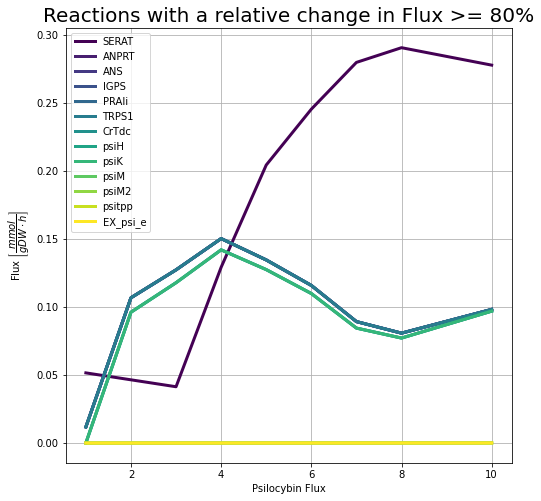

In [10]:
#Plotting depured data frame
fig2 = tr2.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig2.set_xlabel("Psilocybin Flux")
fig2.set_ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$")
fig2.set_title('Reactions with a relative change in Flux >= 80%', size=20)

In [12]:
model.reactions.CrTdc

Reaction identifier,CrTdc
Name,
Memory address,0x020e58e02cc0
Stoichiometry,trp_L_c --> co2_c + tryp_c L_Tryptophan --> CO2 + tryptamine
GPR,
Lower bound,0.0
Upper bound,1000.0


In [46]:
Reactions = tr2.index.values.tolist()
for rx in Reactions:
    ID = model.reactions.get_by_id(rx)
    print(ID.id,"  ",ID.reaction)

SERAT    accoa_c + ser_L_c --> acser_c + coa_c
ANPRT    anth_c + prpp_c --> ppi_c + pran_c
ANS    chor_c + gln_L_c --> anth_c + glu_L_c + h_c + pyr_c
IGPS    2cpr5p_c + h_c --> 3ig3p_c + co2_c + h2o_c
PRAIi    pran_c --> 2cpr5p_c
TRPS1    3ig3p_c + ser_L_c --> g3p_c + h2o_c + trp_L_c
CrTdc    trp_L_c --> co2_c + tryp_c
psiH    2.0 nadph_c + o2_c + tryp_c --> _4htryp_c + h2o_c + 2.0 nadp_c
psiK    _4htryp_c + atp_c --> adp_c + nbc_c
psiM    amet_c + nbc_c --> ahcys_c + baecyst_c
psiM2    amet_c + baecyst_c --> ahcys_c + psi_c
psitpp    h_c + psi_c --> pi_c + psi_e
EX_psi_e    psi_e <=> 
